<a href="https://colab.research.google.com/github/yousuf12334/Online-_Gaming-Sales_Analyses/blob/main/online_Gaming_Sales_Analyses_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Load the data

In [ ]:
df = pd.read_csv('Online Gaming Sales.csv')
output = [] # List to store output result
output.append("Exploratory Data Analysis of Telecommunication service  \n")
output.append("=================\n")


## Explore the data

In [ ]:
print(df.head(10))
output.append(f"First few rows:\n{df.head(10)}")

#Get basic informatin about the dataset
df.info()
output.append(f"Information about the df:/n{df.info()}")

         Date            Product Region Customer_Type  Quantity   Price  \
0  2024-06-11     Game Downloads   West        Casual        17  112.93   
1  2024-10-17     Game Downloads   East      Hardcore       155   22.10   
2  2024-11-11  In-game Purchases  South      Hardcore        18   43.00   
3  2024-08-10      Subscriptions  North      Hardcore       273  158.87   
4  2024-02-28     Game Downloads   East        Casual       176   26.85   
5  2024-09-18     Game Downloads  South        Casual        60   17.44   
6  2024-10-24      Subscriptions   West      Hardcore       161   50.69   
7  2024-03-02  In-game Purchases  South      Hardcore        88  116.63   
8  2024-11-24      Subscriptions  South      Hardcore       404   70.15   
9  2024-01-27     Game Downloads   East      Hardcore       354  122.91   

   Discount   Revenue  
0      0.04   1843.02  
1      0.17   2843.16  
2      0.16    650.16  
3      0.05  41202.93  
4      0.22   3685.97  
5      0.12    920.83  
6     

In [ ]:
df.describe()
output.append(f"Information about the df:/n{df.describe()}")

## Clean the data

In [ ]:
output.append("Data Cleaning Results:\n")
miss_values=df.isnull().sum()
print(miss_values)
output.append(f"Missing values:\n{miss_values}\n")
df.dropna(inplace=True)
df['Date'] =pd.to_datetime(df['Date'])


Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [ ]:
#Check for duplicates
doplicates = df.duplicated().sum()
output.append(f"Number of duplicates Dropped: {doplicates}\n")
df.drop_duplicates(inplace=True)

## Analyze the data

In [ ]:
#Total revenum from cleaning sevices
total_revenue = df['Revenue'].sum()
output.append(f"Total revenue:$ {total_revenue}\n")
print(f"Total revenue: ${total_revenue}")

Total revenue: $22574137.299999997


In [ ]:
#Average price per custome type wise
average_price_per_service= df.groupby('Customer_Type')['Price'].mean()
output.append(f"Average price per customer type:\n")
print(average_price_per_service)

Customer_Type
Casual      104.404590
Hardcore    100.358893
Name: Price, dtype: float64


In [ ]:
#total service provided by region
total_services_per_region=df['Region'].value_counts()
output.append(f"Total services provided by region:\n")
print(total_services_per_region)

Region
East     268
North    248
South    245
West     239
Name: count, dtype: int64


In [ ]:
#total revenue by region
revenue_per_region=df.groupby('Region')['Price'].sum()
output.append("Total revenue by region:\n")
output.append(f"{revenue_per_region}\n")
print(revenue_per_region)

Region
East     27285.06
North    26173.95
South    24509.01
West     24462.27
Name: Price, dtype: float64


## Visualize the data

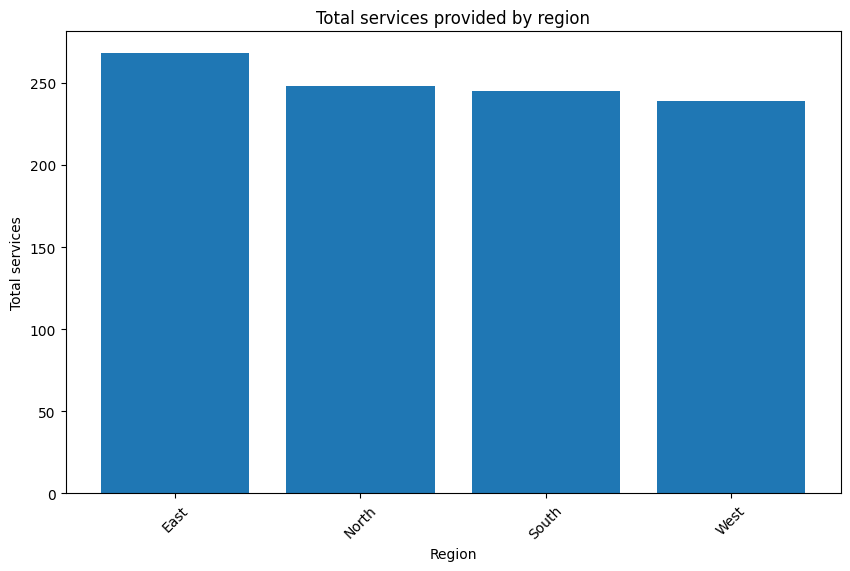

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(total_services_per_region.index,total_services_per_region.values)
plt.title('Total services provided by region')
plt.xlabel('Region')
plt.ylabel('Total services')
plt.xticks(rotation=45)
plt.savefig('total_services_per_region.png')
plt.show()

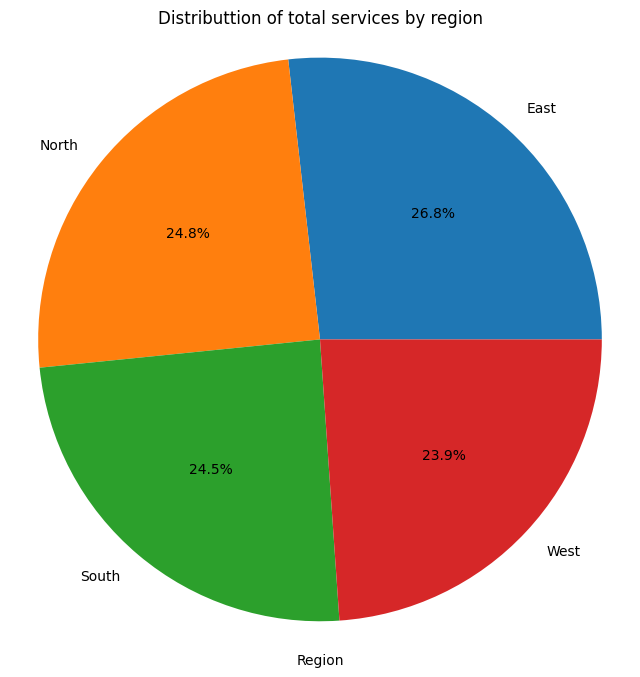

In [ ]:
#pie chart for total serices by region
plt.figure(figsize=(8, 8))
plt.pie(total_services_per_region,labels=total_services_per_region.index,autopct='%1.1f%%')
plt.title('Distributtion of total services by region')
plt.axis('equal')
plt.xlabel('Region')
plt.savefig('total_services_Distribution_per_region_pie.png')
plt.show()

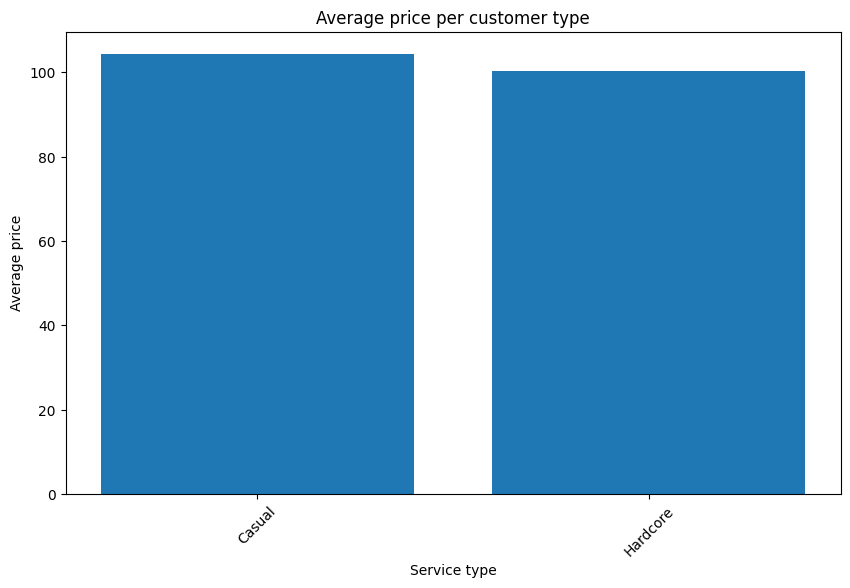

In [ ]:
#Bar plot of average price per service type
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index,average_price_per_service.values)
plt.title('Average price per customer type')
plt.xlabel('Service type')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png') # Save the figure
plt.show()


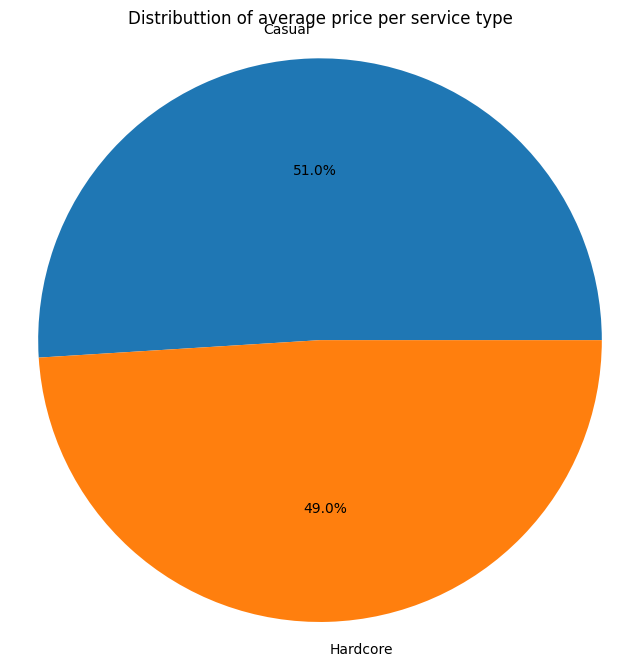

In [ ]:
#pic chart for average price per servise type
plt.figure(figsize=(8, 8))
plt.pie(average_price_per_service,labels=average_price_per_service.index,autopct='%1.1f%%')
plt.title('Distributtion of average price per service type')
plt.axis('equal')
plt.savefig('average_price_per_service_pie.png')
plt.show()

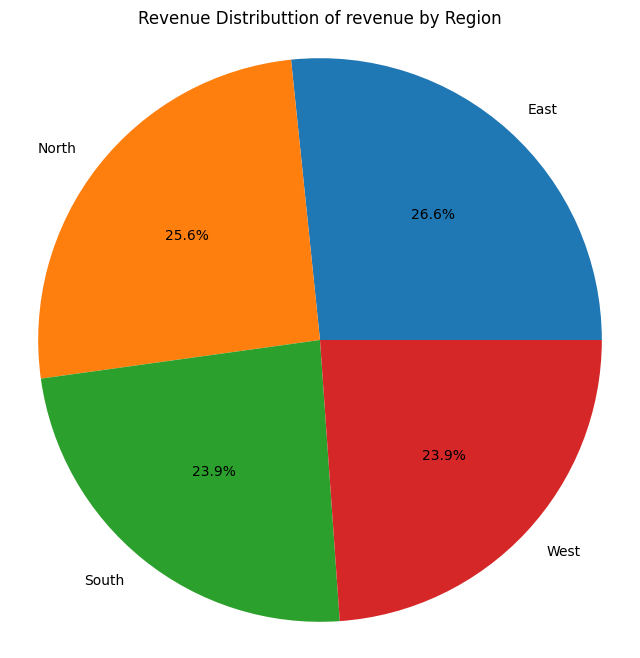

In [ ]:
# pie chart for revenue by service type
plt.figure(figsize=(8, 8))
plt.pie(revenue_per_region,labels=revenue_per_region.index,autopct='%1.1f%%')
plt.title('Revenue Distributtion of revenue by Region')
plt.axis('equal')

plt.savefig('total_revenue_Distribution_per_region_.png')
plt.show()

In [ ]:
#Sabe output to text file
with open('analysis_output.txt', 'w') as f:
        f.writelines(output)